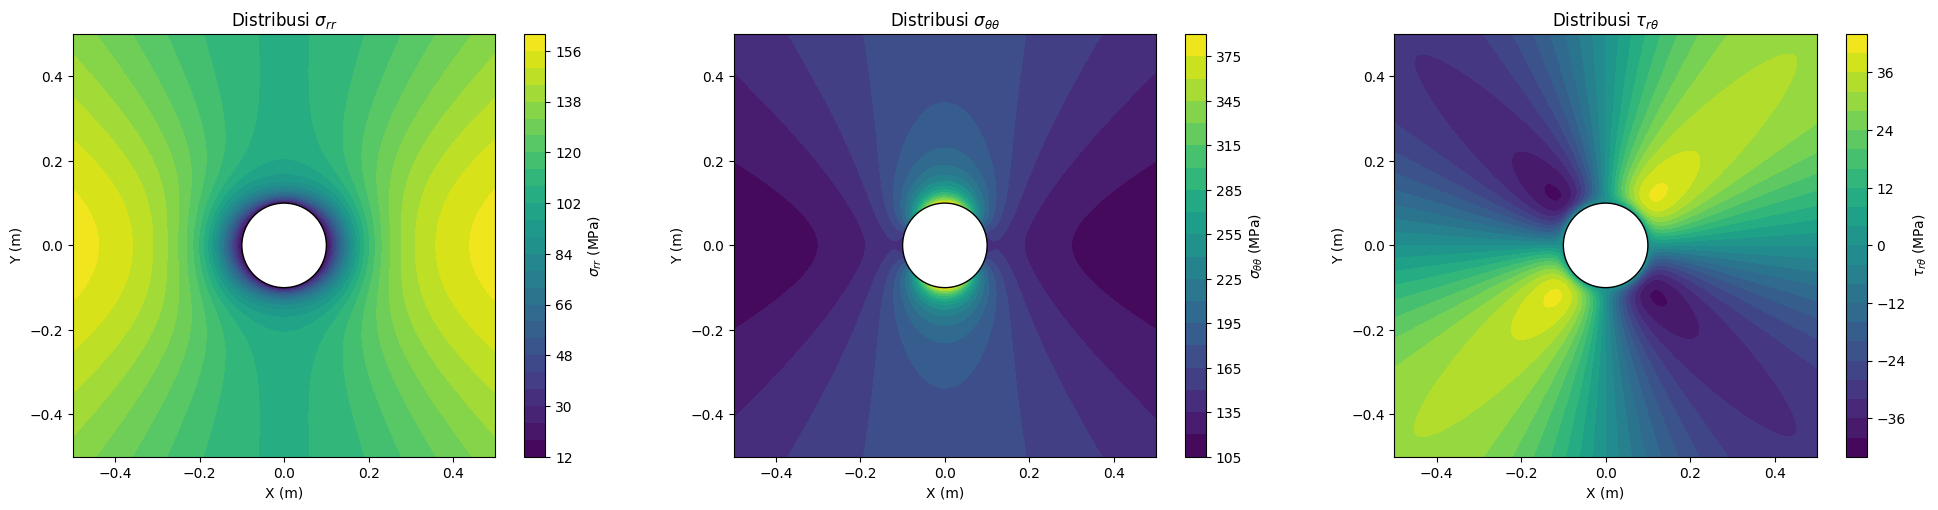

In [104]:
import numpy as np
import matplotlib.pyplot as plt

densitas_batuan = (83 / 10) * 1000  # kg/m^3
densitas_air = 1000  # kg/m^3
g = 9.81  # m/s^2
h_res = 1500  # Rentang Kedalaman 0 - 4000 (m)
Sv_res = (densitas_batuan * g * h_res) / 1e6  # MPa
SHmax = 1.5*Sv_res   
Shmin = Sv_res   
P0 = 14.715       
R = 0.1        
r_max = 5 * R
  
iterasi = 1000  
x_vals = np.linspace(-r_max, r_max, iterasi)
y_vals = np.linspace(-r_max, r_max, iterasi) 
X, Y = np.meshgrid(x_vals, y_vals)
r = np.sqrt(X**2 + Y**2) 
r = np.maximum(r, R)
theta = np.arctan2(Y, X)  

Sigma_rr = (0.5 * (SHmax + Shmin - 2 * P0) * (1 - (R**2 / r**2))) + (0.5 * (SHmax - Shmin) * (1 - (4 * R**2 / r**2) + (3 * R**4 / r**4)) * np.cos(2 * theta)) + (P0 * R**2 / r**2) 
Sigma_theta_theta = (0.5 * (SHmax + Shmin - 2 * P0) * (1 + (R**2 / r**2))) - (0.5 * (SHmax - Shmin) * (1 + (3 * R**4 / r**4)) * np.cos(2 * theta)) - (P0 * R**2 / r**2) 
Tau_r_theta = (0.5 * (SHmax - Shmin) * (1 + (2 * R**2 / r**2) - (3 * R**4 / r**4)) * np.sin(2 * theta)) 


# Plotting
fig, axes = plt.subplots(1, 3, figsize = (20, 5)) 
 
contour1 = axes[0].contourf(X, Y, Sigma_rr, levels = 25, cmap = "viridis") 
axes[0].set_title(r"Distribusi $\sigma_{rr}$") 
axes[0].set_xlabel("X (m)") 
axes[0].set_ylabel("Y (m)") 
fig.colorbar(contour1, ax = axes[0], label = r"$\sigma_{rr}$ (MPa)") 
 
contour2 = axes[1].contourf(X, Y, Sigma_theta_theta, levels = 25, cmap = "viridis") 
axes[1].set_title(r"Distribusi $\sigma_{\theta\theta}$") 
axes[1].set_xlabel("X (m)") 
axes[1].set_ylabel("Y (m)") 
fig.colorbar(contour2, ax = axes[1], label = r"$\sigma_{\theta\theta}$ (MPa)") 
 
contour3 = axes[2].contourf(X, Y, Tau_r_theta, levels = 25, cmap = "viridis") 
axes[2].set_title(r"Distribusi $\tau_{r\theta}$") 
axes[2].set_xlabel("X (m)") 
axes[2].set_ylabel("Y (m)") 
fig.colorbar(contour3, ax = axes[2], label = r"$\tau_{r\theta}$ (MPa)") 
 
for ax in axes: 
    ax.add_patch(plt.Circle((0, 0), R, color = "white", ec = "black", lw = 1))   
    ax.set_xlim(-r_max, r_max) 
    ax.set_ylim(-r_max, r_max) 
    ax.set_aspect("equal")  
 
plt.tight_layout() 
plt.show() 

Lebar breakout pada kedalaman 392.1 m adalah 10.03 derajat


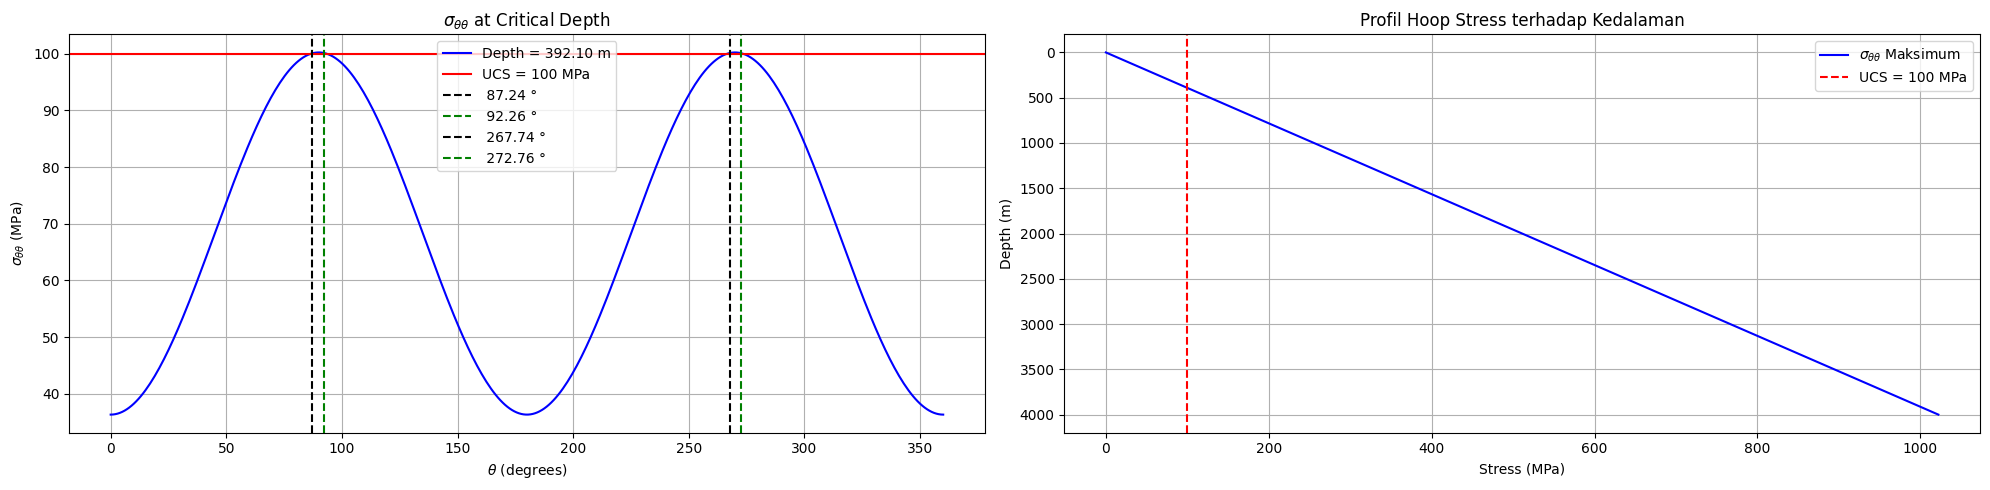

In [117]:
import numpy as np
import matplotlib.pyplot as plt

densitas_batuan = (83 / 10) * 1000  # kg/m^3
densitas_air = 1000  # kg/m^3
g = 9.81  # m/s^2
h = np.linspace(0, 4000, 4000)  # Rentang Kedalaman 0 - 4000 (m)

Sv = (densitas_batuan * g * h) / 1e6  # MPa
PP = (densitas_air * g * h) / 1e6  # MPa
SHmax = 1.5 * Sv
Shmin = Sv
P0 = PP

teta = np.linspace(0, 2 * np.pi, 360)
R = 0.05
r = R
UCS = 100  # MPa

sigma_theta_theta = []
for i in range(len(h)):
    sigma_val = (0.5 * (SHmax[i] + Shmin[i] - 2 * P0[i]) * (1 + (R**2 / r**2))- 0.5 * (SHmax[i] - Shmin[i]) * (1 + (3 * R**4 / r**4)) * np.cos(2 * teta) - (P0[i] * R**2 / r**2))
    sigma_theta_theta.append(sigma_val)\
    
depth_check = False
for i in range(len(h)):
    max_sigma = np.max(sigma_theta_theta[i])
    if max_sigma > UCS:
        depth_check = True
        critical_depth = h[i]
        breakout_start_depth = i
        break

# Membuat figure dengan dua subplot
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

if depth_check:
    hoop_stress = sigma_theta_theta[breakout_start_depth]
    axes[0].plot(np.degrees(teta), hoop_stress, label=f'Depth = {critical_depth:.2f} m', color='b')
    axes[0].axhline(UCS, linestyle='-', label=f'UCS = {UCS} MPa' , color='r')
    axes[0].set_xlabel(r"$\theta$ (degrees)")
    axes[0].set_ylabel(r"$\sigma_{\theta\theta}$ (MPa)")
    axes[0].set_title(r"$\sigma_{\theta\theta}$ at Critical Depth")

else:
    print("Tidak ada kedalaman di mana σ_θθ melebihi 100 MPa")

breakout = hoop_stress >= UCS
theta_breakout = teta[breakout]

if len(theta_breakout) > 0:
    sudut_break1 = [] # Sudut breakout yang berada di rentang 0 hingga 𝜋
    sudut_break2 = [] # Sudut breakout yang berada di rentang 0 hingga 𝜋
    for theta in theta_breakout:
        if theta < np.pi:
            sudut_break1.append(theta)
        else:
            sudut_break2.append(theta)
    
    if len(sudut_break1) > 0:
        lebar_breakout1 = np.degrees(max(sudut_break1)) - np.degrees(min(sudut_break1))
    else:
        lebar_breakout1 = 0

    if len(sudut_break2) > 0:
        lebar_breakout2 = np.degrees(max(sudut_break2)) - np.degrees(min(sudut_break2))
    else:
        lebar_breakout2 = 0
        
    total_breakout_width = lebar_breakout1 + lebar_breakout2
    print(f"Lebar breakout pada kedalaman {critical_depth:.1f} m adalah {total_breakout_width:.2f} derajat")

    max_sudut_1 = np.degrees(max(sudut_break1)) 
    min_sudut_1 = np.degrees(min(sudut_break1))
    max_sudut_2 = np.degrees(max(sudut_break2)) 
    min_sudut_2 = np.degrees(min(sudut_break2))

    axes[0].axvline(np.degrees(min(sudut_break1)), color='k', linestyle='--', label=f' {min_sudut_1:.2f} °')
    axes[0].axvline(np.degrees(max(sudut_break1)), color='g', linestyle='--', label=f' {max_sudut_1:.2f} °')
    axes[0].axvline(np.degrees(min(sudut_break2)), color='k', linestyle='--', label=f' {min_sudut_2:.2f} °')
    axes[0].axvline(np.degrees(max(sudut_break2)), color='g', linestyle='--', label=f' {max_sudut_2:.2f} °')    

else:
    print("Tidak ada breakout yang terjadi.")

# Plot profil tegangan hoop terhadap kedalaman
axes[1].plot(np.max(sigma_theta_theta, axis=1), h, label=r'$\sigma_{\theta\theta}$ Maksimum', color='b')
axes[1].axvline(UCS, color='r', linestyle='--', label='UCS = 100 MPa')
axes[1].set_xlabel("Stress (MPa)")
axes[1].set_ylabel("Depth (m)")
axes[1].set_title("Profil Hoop Stress terhadap Kedalaman")
axes[1].invert_yaxis()  # Kedalaman bertambah ke bawah

axes[0].grid()
axes[0].legend()
axes[1].grid()
axes[1].legend()

plt.tight_layout()
plt.show()